<a href="https://colab.research.google.com/github/zcohen949/Astron-1221/blob/main/Week3_4_RotationCurveOfMilkyWay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.units as u # imports a Python package to call various units
import astropy.constants as ac # imports a Python package to call the value of constants
import numpy as np # imports the numpy package which allows us to conduct mathematical operations for the defined quantities

Bulge

In [ ]:
def calculatingOrbitalVelocity(M, R):
  """
  This function calculates the orbital velocity
  Input:
  M, the mass of the central object
  R, the orbital radius of the object
  Output:
  orbitalVelocity, the orbital velocity of the object
  """
  orbitalVelocity = np.sqrt(ac.G * M / R)
  return orbitalVelocity

In [ ]:
M_Bulge = 10**10 * u.solMass # sets the mass of the bulge in units of solar masses
R_Bulge_arr = np.array((np.arange(1,30))) * u.kiloparsec # Orbital radius of the Milky Way past the Bulge, and creates an array, which we can use to calculate orbital velocity at

# Calculating orbital velocity of the Milky Way Bulge
v_Bulge = calculatingOrbitalVelocity(M_Bulge, R_Bulge_arr) # using the predefined function, calculates the orbital velocity of the bulge
print(v_Bulge.to(u.km/u.s)) # writes out the values at each point in the array

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


In [ ]:
R_Bulge_arr = np.array((np.arange(1,30))) * u.kiloparsec # Orbital radius of the Milky Way past the Bulge

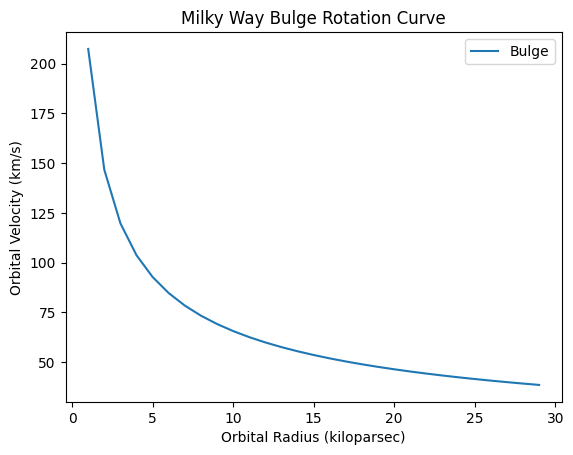

In [ ]:
import matplotlib.pyplot as plt # imports a plotting package

plt.plot(R_Bulge_arr, v_Bulge.to(u.km/u.s), label="Bulge") # Plotting velocity vs. orbital radius
plt.xlabel('Orbital Radius (kiloparsec)') # Add x axis label
plt.ylabel('Orbital Velocity (km/s)') # Add y axis label
plt.legend() # Add legend
plt.title('Milky Way Bulge Rotation Curve') # Add title
plt.show() # creates the graph

Disk

In [ ]:
M_disk = 1e11 * u.solMass # Defines the total mass of the disk in units of solar masses
R_disk = 10 * u.kpc # Defines the outer edge of the disk's radius in kiloparsecs
density_disk = M_disk / (np.pi * (R_disk**2)) # this creates a function to calculate the density with the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2)) # prints out the calculated value below

318.3098861837907 1e+06 solMass / kpc2


In [ ]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [ ]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

999.0264638415543 1e+06 solMass at 1 kpc
24975.66159603886 1e+06 solMass at 5 kpc


In [ ]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Calculate enclosed mass for the Milky Way using the Bulge and Disk components
    Input: R - orbital radius, density - density of the disk as calculated above, M_bulge - mass of the bulge
    Output: M_total - finds enclosed mass of Milky Way, which is set to be the sum of the Bulge and Disk
    """
    M_bulge = 1e10 * u.solMass
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)

In [ ]:
# redefine v_bulge_arr to avoid confusion
v_bulge_arr = calculatingOrbitalVelocity(M_Bulge, R_Bulge_arr)
print(v_bulge_arr) # prints values below

[0.81696389 0.57768071 0.47167432 0.40848195 0.36535736 0.33352411
 0.30878333 0.28884035 0.2723213  0.25834667 0.24632388 0.23583716
 0.22658502 0.21834278 0.21093917 0.20424097 0.19814285 0.19256024
 0.18742437 0.18267868 0.17827614 0.17417729 0.17034875 0.16676206
 0.16339278 0.1602198  0.15722477 0.15439166 0.15170639] m(3/2) solMass(1/2) / (kg(1/2) kpc(1/2) s)


In [ ]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_Bulge_arr)) * u.solMass # converts to solar masses
M_total = np.zeros(len(R_Bulge_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_Bulge_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_Bulge_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_Bulge_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculatingOrbitalVelocity(M_disk, R_Bulge_arr)
v_bulge_disk_arr = calculatingOrbitalVelocity(M_total, R_Bulge_arr)

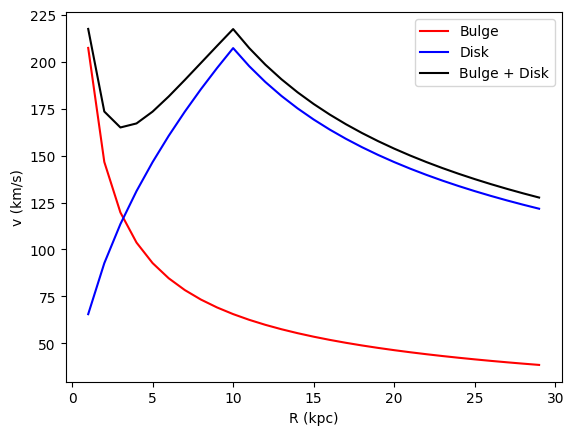

In [ ]:
# Plot them all
plt.plot(R_Bulge_arr.to(u.kpc), v_Bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_Bulge_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_Bulge_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)') # sets the x-axis label
plt.ylabel('v (km/s)') # sets the y-axis label
plt.legend() # creates a legend in the figure with each function
plt.show() # creates a visable graph below

Halo

In [ ]:
M_Halo = 1e12 * u.solMass # Defines the disk's total mass in units of solar masses
R_Halo = 30 * u.kpc # Defines the outer edge of the disk radius
density_Halo = M_Halo / (np.pi * (4/3 * R_Halo**3)) # calculates the density using predefined functions
print(density_Halo.to(1e6 * u.solMass/u.kpc**3))# prints the density below in the unit of solar mass per square kpc

8.841941282883074 1e+06 solMass / kpc3


In [ ]:
def calculatingEnclosedMassForHalo(R_Halo, density= 9 * 1e5 * u.solMass/u.kpc**3):
    """
    Calculates the enclosed mass for the Halo component
    Input: R - orbital radius of Halo, density - density of the Halo as calculated above
    Output: M - enclosed mass
    """
    M = 0. * u.solMass
    if R_Halo < 30 * u.kpc:
        M = np.pi * 4/3 * (R_Halo**3) * density
    return(M)

In [ ]:
# redefine v_bulge_arr to avoid confusion
v_Halo_arr = calculatingOrbitalVelocity(M_Halo, R_Halo)
print(v_Halo_arr)

1.491565173455946 m(3/2) solMass(1/2) / (kg(1/2) kpc(1/2) s)


In [ ]:
# Makes an array for R_Halo and converts to kiloparsec
R_Halo_arr = np.array((np.arange(1,30))) * u.kiloparsec


In [ ]:
# Define arrays to be calculated
M_Halo = np.zeros(len(R_Halo_arr)) * u.solMass
M_total = np.zeros(len(R_Halo_arr)) * u.solMass

# Calculating enclosed masses for the halo and total component
for i in np.arange(len(R_Bulge_arr)):
    M_Halo[i] = calculatingEnclosedMassForHalo(R_Halo_arr[i])
    M_total[i] = M_Halo[i] + M_Bulge + M_disk[i] # finds the total mass at each point in the previous arrays

# Calculating the resulting orbital velocity due to each component
v_Halo_arr = calculatingOrbitalVelocity(M_Halo, R_Halo_arr)
v_bulge_disk_Halo_arr = calculatingOrbitalVelocity(M_total, R_Halo_arr)

In [ ]:
print(M_total) # prints the value calculated above

[1.10027964e+10 1.40262651e+10 1.90930258e+10 2.62256977e+10
 3.54469005e+10 4.67792535e+10 6.02453763e+10 7.58678882e+10
 9.36694088e+10 1.13672558e+11 1.14920398e+11 1.16417053e+11
 1.18185141e+11 1.20247283e+11 1.22626097e+11 1.25344203e+11
 1.28424220e+11 1.31888768e+11 1.35760467e+11 1.40061936e+11
 1.44815794e+11 1.50044661e+11 1.55771156e+11 1.62017899e+11
 1.68807509e+11 1.76162605e+11 1.84105808e+11 1.92659737e+11
 2.01847010e+11] solMass


In [ ]:
from google.colab import files # calls a file from google colab
uploaded = files.upload() # uploads the file to be used as data

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (6).txt


In [ ]:
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt") # uploads the file to be used as data

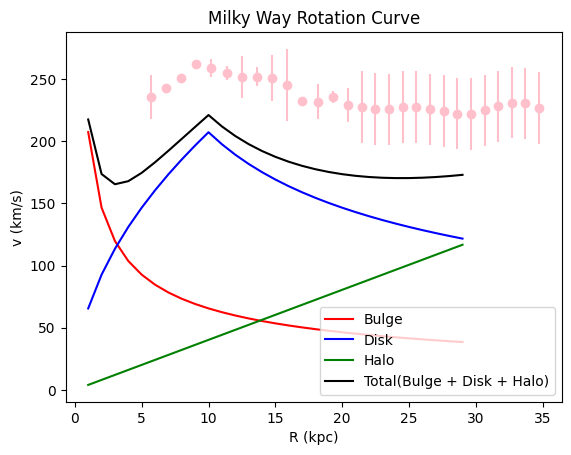

In [ ]:
# Plot them all
plt.plot(R_Bulge_arr.to(u.kpc), v_Bulge.to(u.km/u.s), color="red", label="Bulge") # plotting bulge and sets a color and label
plt.plot(R_Bulge_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk and sets a color and label
plt.plot(R_Halo_arr.to(u.kpc), v_Halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo and sets a color and label
plt.plot(R_Bulge_arr.to(u.kpc), v_bulge_disk_Halo_arr.to(u.km/u.s), color="black", label="Total(Bulge + Disk + Halo)") # plotting bulge + disk + halo components, while also setting color and label
plt.xlabel('R (kpc)') # creates a label for the x-axis
plt.ylabel('v (km/s)') # creates a label for the y-axis
plt.legend() # to show the legend of our figures
plt.title('Milky Way Rotation Curve') # Adds a title to the graph
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="pink", color="pink", fmt='o', label="Data") #inputs the data imported in the code above, to compare to our calculated values in the graph
plt.show() # creates the graph below with all components defined above